In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
data.shape

(907, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
for col in data:
    print("Feature {col}")
    print(f"The unique count of {col} is :",data[col].nunique(),"\n")
    print(f"The unique count of {col} is :",data[col].unique(),"\n\n\n")

Feature {col}
The unique count of country is : 1 

The unique count of country is : ['IND'] 



Feature {col}
The unique count of country_long is : 1 

The unique count of country_long is : ['India'] 



Feature {col}
The unique count of name is : 907 

The unique count of name is : ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 '

In [8]:
#dropping the irrelevant features from the dataset which has no impact to label.
data = data.drop(columns = ['country','owner','country_long','name','gppd_idnr','latitude','longitude','other_fuel2','other_fuel3',
                    'url','wepp_id','year_of_capacity_data','generation_data_source','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'])

In [9]:
data.shape

(907, 11)

In [10]:
data.other_fuel1.unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [11]:
check = data[data.other_fuel1 == 'Cogeneration']

In [12]:
check.primary_fuel.unique()

array(['Coal'], dtype=object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   other_fuel1          198 non-null    object 
 3   commissioning_year   527 non-null    float64
 4   source               907 non-null    object 
 5   geolocation_source   888 non-null    object 
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(7), object(4)
memory usage: 78.1+ KB


#Treating NaNs

In [14]:
for col in data:
    print(f" {col}: ",data[col].isnull().sum())

 capacity_mw:  0
 primary_fuel:  0
 other_fuel1:  709
 commissioning_year:  380
 source:  0
 geolocation_source:  19
 generation_gwh_2014:  509
 generation_gwh_2015:  485
 generation_gwh_2016:  473
 generation_gwh_2017:  467
 generation_gwh_2018:  459


In [15]:
data['other_fuel1'] = data['other_fuel1'].replace(to_replace = np.nan, value='Oil')

In [16]:
data['commissioning_year']= data['commissioning_year'].fillna(method = 'pad',axis = 0)

In [17]:
data['geolocation_source']= data['geolocation_source'].fillna(method = 'pad',axis = 0)

In [18]:
data['geolocation_source'].value_counts(dropna = False)

WRI                                     780
Industry About                          123
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [19]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer()

In [20]:
knn_imp = KNNImputer(n_neighbors=10)
data['generation_gwh_2014'] = knn_imp.fit_transform(data[['generation_gwh_2014']])

In [21]:
knn_imp = KNNImputer(n_neighbors=10)
data['generation_gwh_2015'] = knn_imp.fit_transform(data[['generation_gwh_2015']])

In [22]:
knn_imp = KNNImputer(n_neighbors=10)
data['generation_gwh_2016'] = knn_imp.fit_transform(data[['generation_gwh_2016']])

In [23]:
knn_imp = KNNImputer(n_neighbors=10)
data['generation_gwh_2017'] = knn_imp.fit_transform(data[['generation_gwh_2017']])

In [24]:
knn_imp = KNNImputer(n_neighbors=10)
data['generation_gwh_2018'] = knn_imp.fit_transform(data[['generation_gwh_2018']])

In [25]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,Coal,Oil,2011.0,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,Wind,Oil,2011.0,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [26]:
data.shape

(907, 11)

In [27]:
data.isna().sum()

capacity_mw            0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   other_fuel1          907 non-null    object 
 3   commissioning_year   907 non-null    float64
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(7), object(4)
memory usage: 78.1+ KB


In [29]:
#Encoding the objects with int for the features have class input

In [30]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enco = OrdinalEncoder(categories=[['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear']])
data['primary_fuel'] = enco.fit_transform(data[['primary_fuel']])

In [32]:
data['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [33]:
enco = OrdinalEncoder(categories=[data['other_fuel1'].unique()])
data['other_fuel1'] = enco.fit_transform(data[['other_fuel1']])

In [34]:
enco = OrdinalEncoder(categories=[data['source'].unique()])
data['source'] = enco.fit_transform(data[['source']])

In [35]:
enco = OrdinalEncoder(categories=[data['geolocation_source'].unique()])
data['geolocation_source'] = enco.fit_transform(data[['geolocation_source']])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    float64
 2   other_fuel1          907 non-null    float64
 3   commissioning_year   907 non-null    float64
 4   source               907 non-null    float64
 5   geolocation_source   907 non-null    float64
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(11)
memory usage: 78.1 KB


In [37]:
data.isna().sum()

capacity_mw            0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [38]:
data.describe()

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,2.368247,0.005513,1999.165380,26.576626,1.131202,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,1.729821,0.099516,16.742868,47.654888,0.350633,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1.000000,0.000000,1990.000000,3.000000,1.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,2.000000,0.000000,2003.000000,3.000000,1.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,4.000000,0.000000,2013.000000,15.500000,1.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,7.000000,2.000000,2018.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [39]:
data.shape

(907, 11)

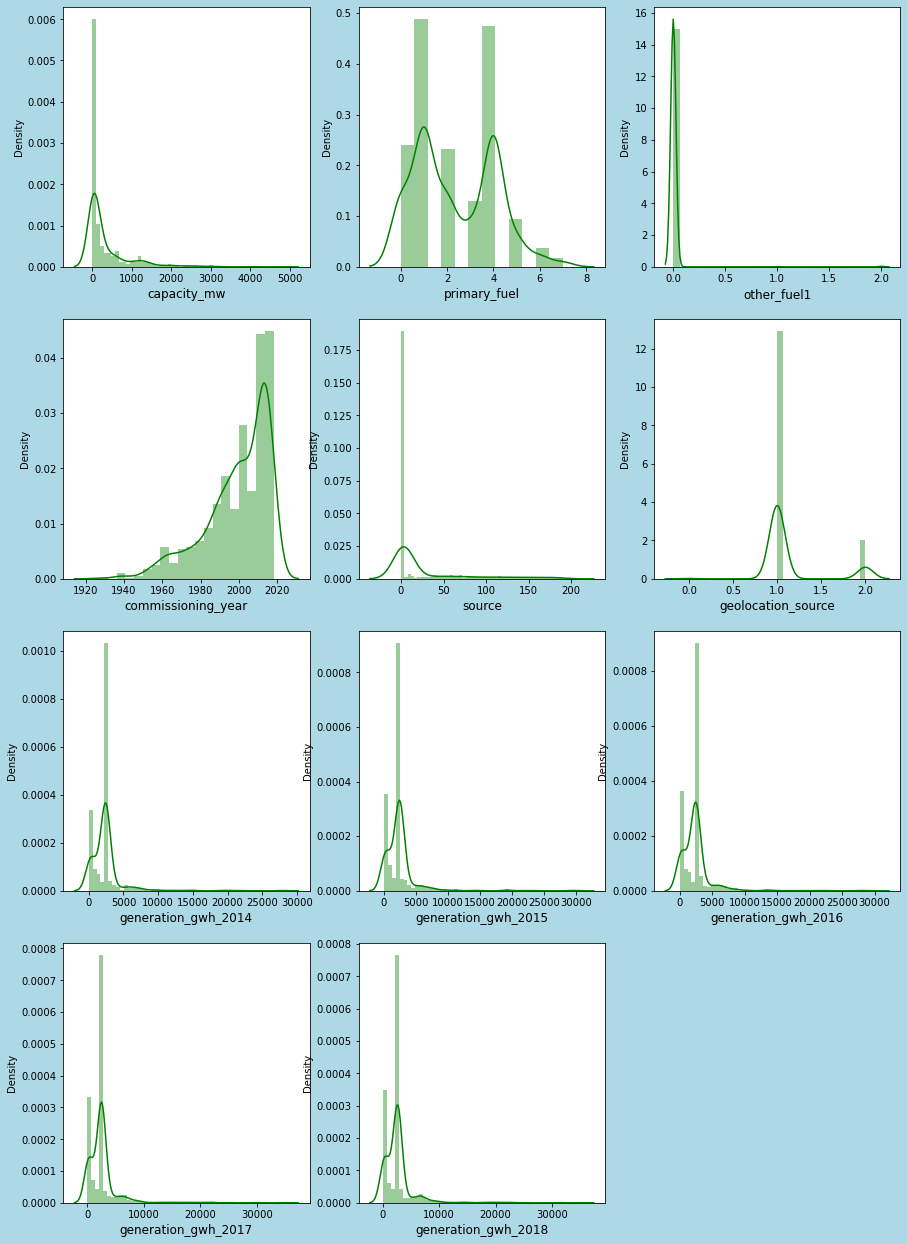

In [40]:
plt.figure(figsize=(15,22),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1
plt.show()

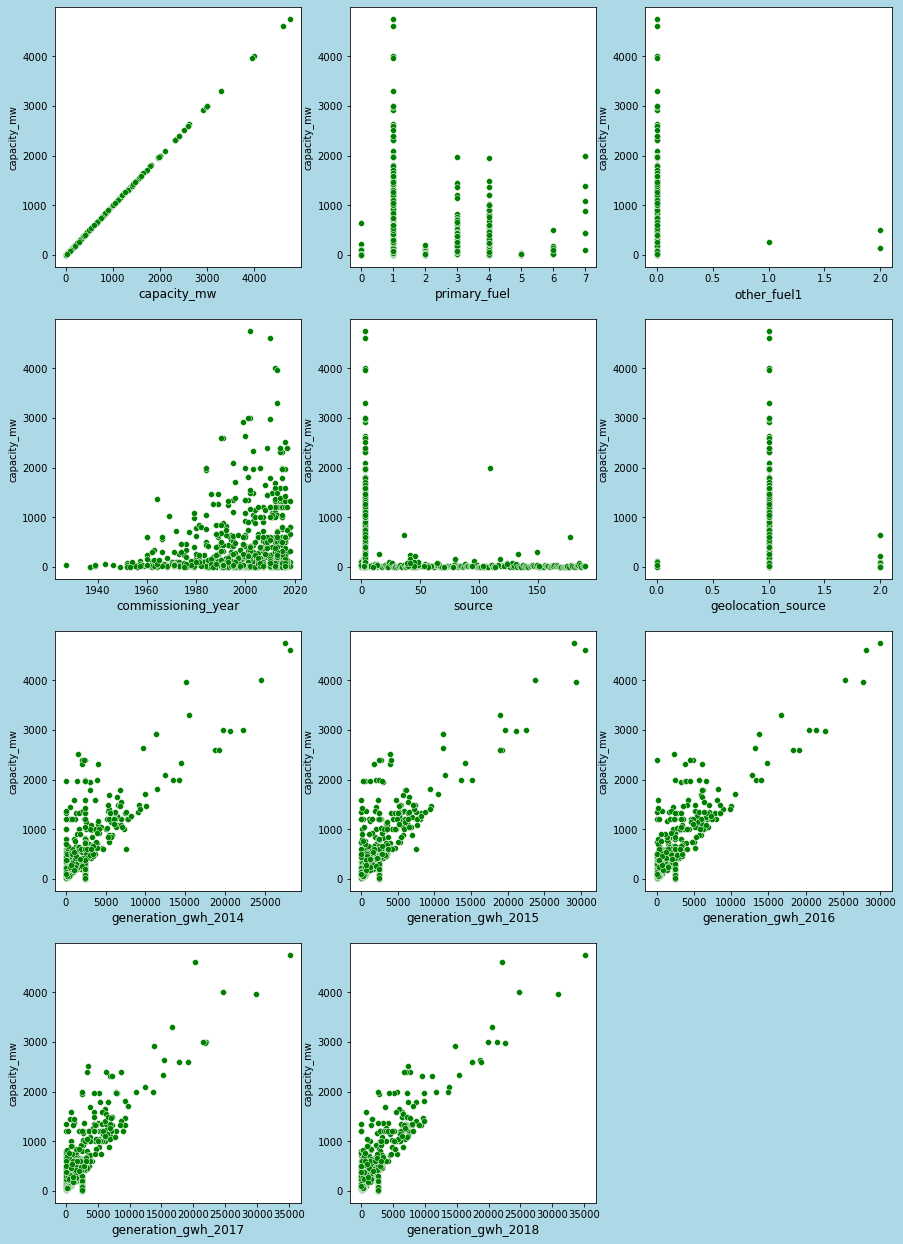

In [41]:
plt.figure(figsize=(15,22),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(data[column],data['capacity_mw'],color = 'green')
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1
plt.show()

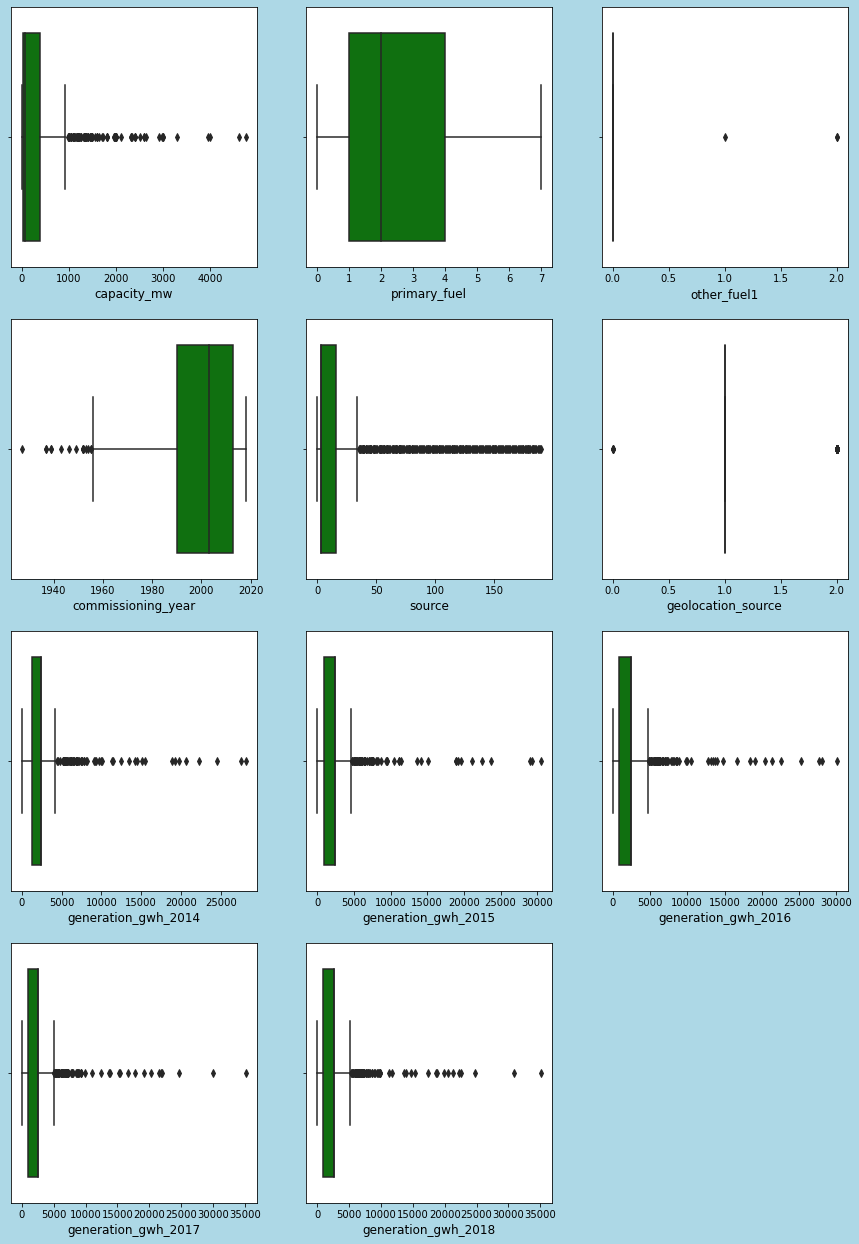

In [42]:
plt.figure(figsize=(15,22),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1
plt.show()

In [43]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [44]:
capacity_mw_high = q3.capacity_mw + (1.5 * (iqr.capacity_mw))
capacity_mw_low = q1.capacity_mw - (1.5 * (iqr.capacity_mw))
Drop_capacity_mw = np.where((data.capacity_mw > capacity_mw_high) | (data.capacity_mw < capacity_mw_low) )
Drop_capacity_mw
data = data.drop(data.index[Drop_capacity_mw])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,0.0,0.0,2011.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...,...,...,...
789,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
790,903,3.0,0.0,0.0,2016.0,78.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
791,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
792,905,80.0,1.0,0.0,2016.0,41.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [45]:
commissioning_year_high = q3.commissioning_year + (1.5 * (iqr.commissioning_year))
commissioning_year_low = q1.commissioning_year - (1.5 * (iqr.commissioning_year))
Drop_commissioning_year = np.where((data.commissioning_year > commissioning_year_high) | (data.commissioning_year < commissioning_year_low) )
Drop_commissioning_year
data = data.drop(data.index[Drop_commissioning_year])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,0.0,0.0,2011.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...,...,...,...
772,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
773,903,3.0,0.0,0.0,2016.0,78.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
774,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
775,905,80.0,1.0,0.0,2016.0,41.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [46]:
other_fuel1_high = q3.other_fuel1 + (1.5 * (iqr.other_fuel1))
other_fuel1_low = q1.other_fuel1 - (1.5 * (iqr.other_fuel1))
Drop_other_fuel1 = np.where((data.other_fuel1 > other_fuel1_high) | (data.other_fuel1 < other_fuel1_low) )
Drop_other_fuel1
data = data.drop(data.index[Drop_other_fuel1])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,0.0,0.0,2011.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...,...,...,...
769,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
770,903,3.0,0.0,0.0,2016.0,78.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
771,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
772,905,80.0,1.0,0.0,2016.0,41.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [47]:
source_high = q3.source + (1.5 * (iqr.source))
source_low = q1.source - (1.5 * (iqr.source))
Drop_source = np.where((data.source > source_high) | (data.source < source_low) )
Drop_source
data = data.drop(data.index[Drop_source])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,0.0,0.0,2011.0,0.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...,...,...,...
565,898,42.0,2.0,0.0,1991.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
566,899,600.0,1.0,0.0,2007.0,3.0,1.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
567,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
568,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [48]:
geolocation_source_high = q3.geolocation_source + (1.5 * (iqr.geolocation_source))
geolocation_source_low = q1.geolocation_source - (1.5 * (iqr.geolocation_source))
Drop_geolocation_source = np.where((data.geolocation_source > geolocation_source_high) | (data.geolocation_source < geolocation_source_low) )
Drop_geolocation_source
data = data.drop(data.index[Drop_geolocation_source])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
3,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
4,6,60.0,4.0,0.0,1970.0,3.0,1.0,157.558250,152.195200,61.421350,89.629600,48.327150
...,...,...,...,...,...,...,...,...,...,...,...,...
535,898,42.0,2.0,0.0,1991.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
536,899,600.0,1.0,0.0,2007.0,3.0,1.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
537,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
538,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [49]:
generation_gwh_2014_high = q3.generation_gwh_2014 + (1.5 * (iqr.generation_gwh_2014))
generation_gwh_2014_low = q1.generation_gwh_2014 - (1.5 * (iqr.generation_gwh_2014))
Drop_generation_gwh_2014 = np.where((data.generation_gwh_2014 > generation_gwh_2014_high) | (data.generation_gwh_2014 < generation_gwh_2014_low) )
Drop_generation_gwh_2014
data = data.drop(data.index[Drop_generation_gwh_2014])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
3,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
4,6,60.0,4.0,0.0,1970.0,3.0,1.0,157.558250,152.195200,61.421350,89.629600,48.327150
...,...,...,...,...,...,...,...,...,...,...,...,...
527,898,42.0,2.0,0.0,1991.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
528,899,600.0,1.0,0.0,2007.0,3.0,1.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
529,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
530,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [50]:
generation_gwh_2015_high = q3.generation_gwh_2015 + (1.5 * (iqr.generation_gwh_2015))
generation_gwh_2015_low = q1.generation_gwh_2015 - (1.5 * (iqr.generation_gwh_2015))
Drop_generation_gwh_2015 = np.where((data.generation_gwh_2015 > generation_gwh_2015_high) | (data.generation_gwh_2015 < generation_gwh_2015_low) )
Drop_generation_gwh_2015
data = data.drop(data.index[Drop_generation_gwh_2015])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
3,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
4,6,60.0,4.0,0.0,1970.0,3.0,1.0,157.558250,152.195200,61.421350,89.629600,48.327150
...,...,...,...,...,...,...,...,...,...,...,...,...
526,898,42.0,2.0,0.0,1991.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
527,899,600.0,1.0,0.0,2007.0,3.0,1.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
528,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
529,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [51]:
generation_gwh_2016_high = q3.generation_gwh_2016 + (1.5 * (iqr.generation_gwh_2016))
generation_gwh_2016_low = q1.generation_gwh_2016 - (1.5 * (iqr.generation_gwh_2016))
Drop_generation_gwh_2016 = np.where((data.generation_gwh_2016 > generation_gwh_2016_high) | (data.generation_gwh_2016 < generation_gwh_2016_low) )
Drop_generation_gwh_2016
data = data.drop(data.index[Drop_generation_gwh_2016])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
3,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
4,6,60.0,4.0,0.0,1970.0,3.0,1.0,157.558250,152.195200,61.421350,89.629600,48.327150
...,...,...,...,...,...,...,...,...,...,...,...,...
526,898,42.0,2.0,0.0,1991.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
527,899,600.0,1.0,0.0,2007.0,3.0,1.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
528,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
529,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [53]:
generation_gwh_2017_high = q3.generation_gwh_2017 + (1.5 * (iqr.generation_gwh_2017))
generation_gwh_2017_low = q1.generation_gwh_2017 - (1.5 * (iqr.generation_gwh_2017))
Drop_generation_gwh_2017= np.where((data.generation_gwh_2017> generation_gwh_2017_high) | (data.generation_gwh_2017< generation_gwh_2017_low) )
Drop_generation_gwh_2017
data = data.drop(data.index[Drop_generation_gwh_2017])
data.shape
data.reset_index()

,index,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,98.0,1.0,0.0,2011.0,1.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,2,39.2,2.0,0.0,2011.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,3,135.0,3.0,0.0,2004.0,3.0,1.0,617.789264,843.747000,886.004428,663.774500,626.239128
3,5,250.0,1.0,0.0,2005.0,3.0,1.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
4,6,60.0,4.0,0.0,1970.0,3.0,1.0,157.558250,152.195200,61.421350,89.629600,48.327150
...,...,...,...,...,...,...,...,...,...,...,...,...
526,898,42.0,2.0,0.0,1991.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
527,899,600.0,1.0,0.0,2007.0,3.0,1.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180
528,901,106.6,6.0,0.0,1993.0,3.0,1.0,0.000000,0.000000,0.000000,2547.759305,0.000000
529,904,25.5,2.0,0.0,2016.0,2.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


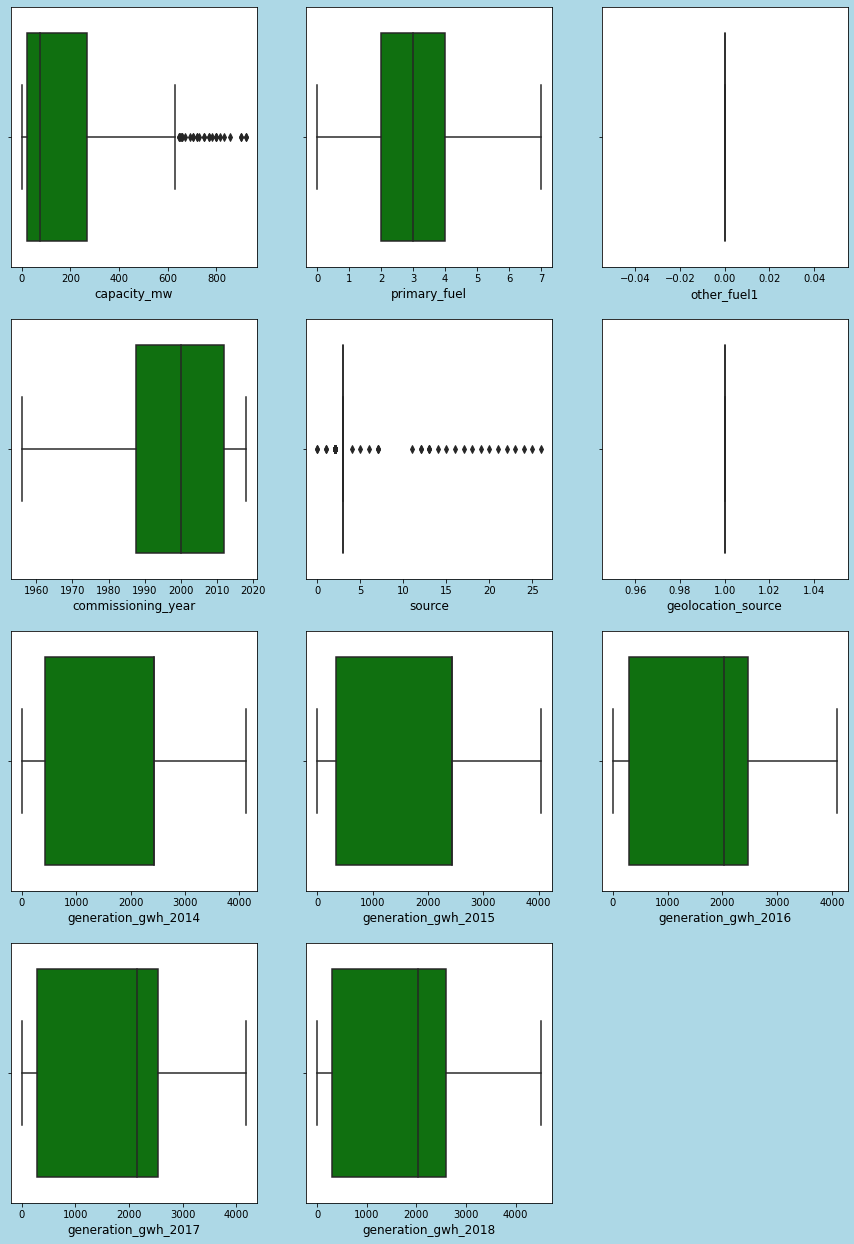

In [54]:
plt.figure(figsize=(15,22),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1
plt.show()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 1 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          531 non-null    float64
 1   primary_fuel         531 non-null    float64
 2   other_fuel1          531 non-null    float64
 3   commissioning_year   531 non-null    float64
 4   source               531 non-null    float64
 5   geolocation_source   531 non-null    float64
 6   generation_gwh_2014  531 non-null    float64
 7   generation_gwh_2015  531 non-null    float64
 8   generation_gwh_2016  531 non-null    float64
 9   generation_gwh_2017  531 non-null    float64
 10  generation_gwh_2018  531 non-null    float64
dtypes: float64(11)
memory usage: 49.8 KB


In [58]:
#checking for co relation


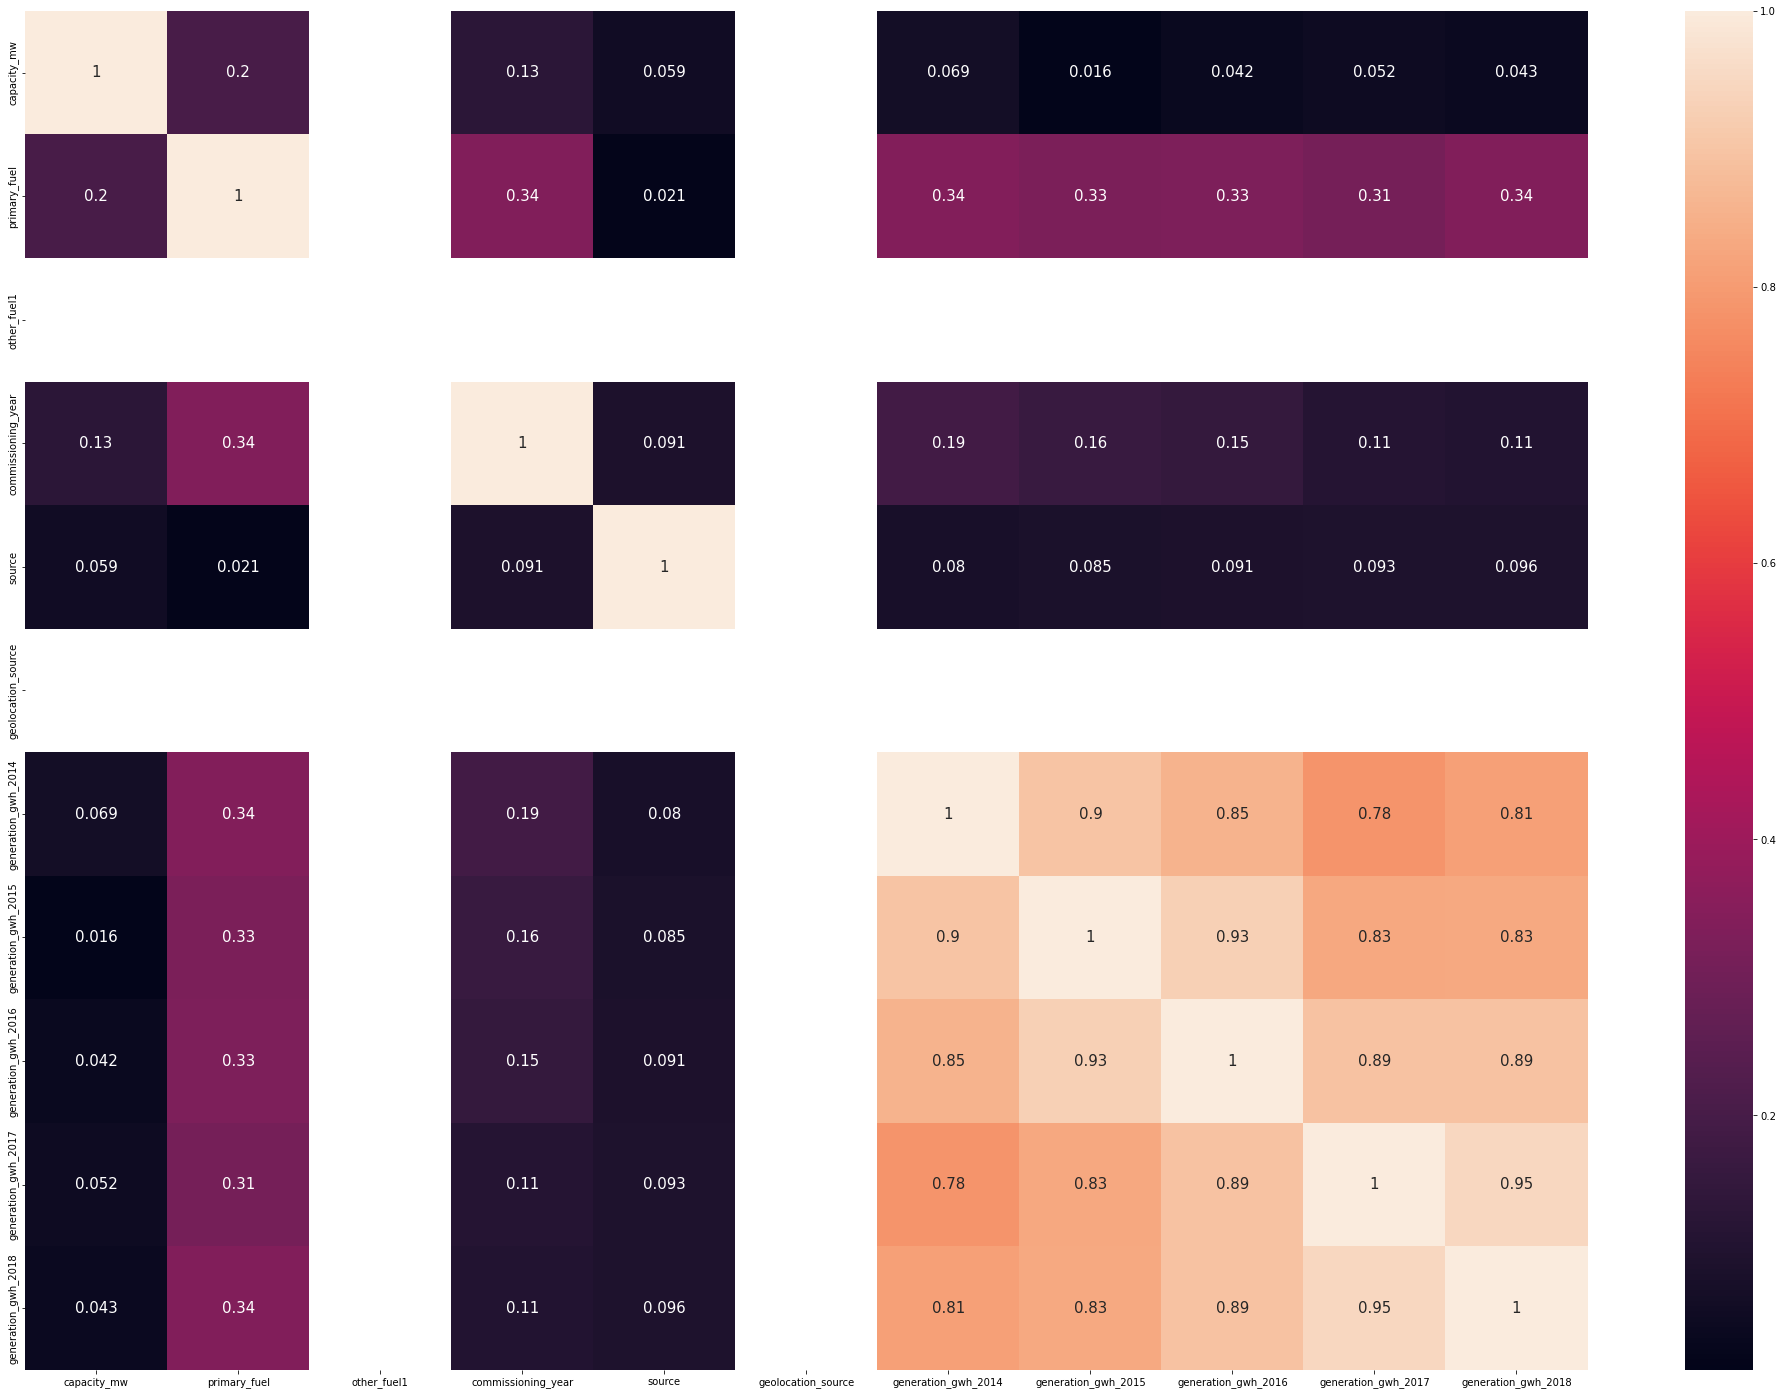

In [59]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

In [60]:
data.other_fuel1.unique()

array([0.])

In [61]:
data.geolocation_source.unique()

array([1.])

In [63]:
data.shape

(531, 11)

In [62]:
#dropping Other_fuel1 and geolocation_source, since has no relation and has only one value only after removig outlier

In [66]:
data = data.drop(columns = ['other_fuel1','geolocation_source'], axis =1)

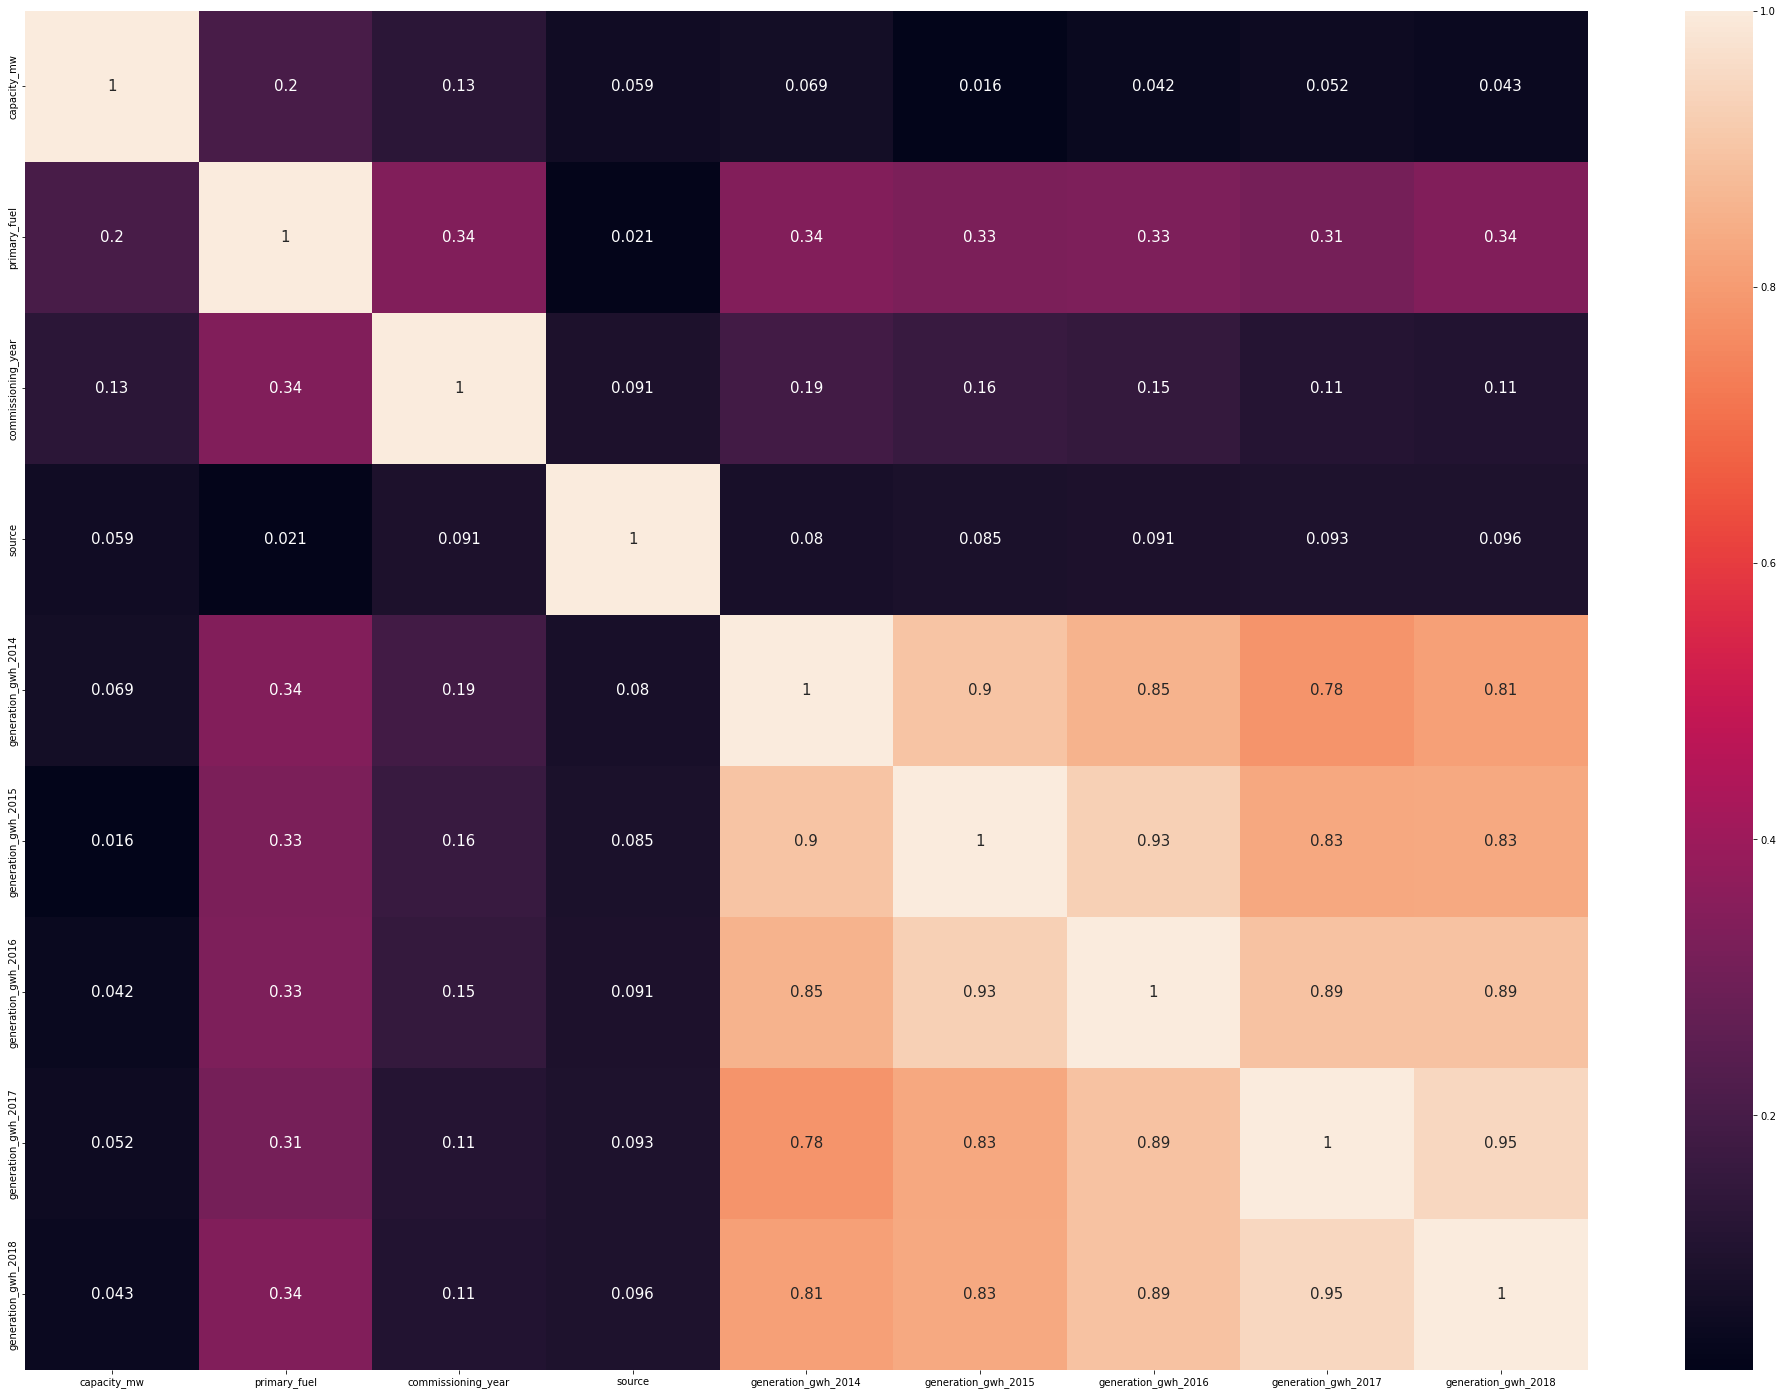

In [67]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

In [68]:
data.shape

(531, 9)

In [69]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

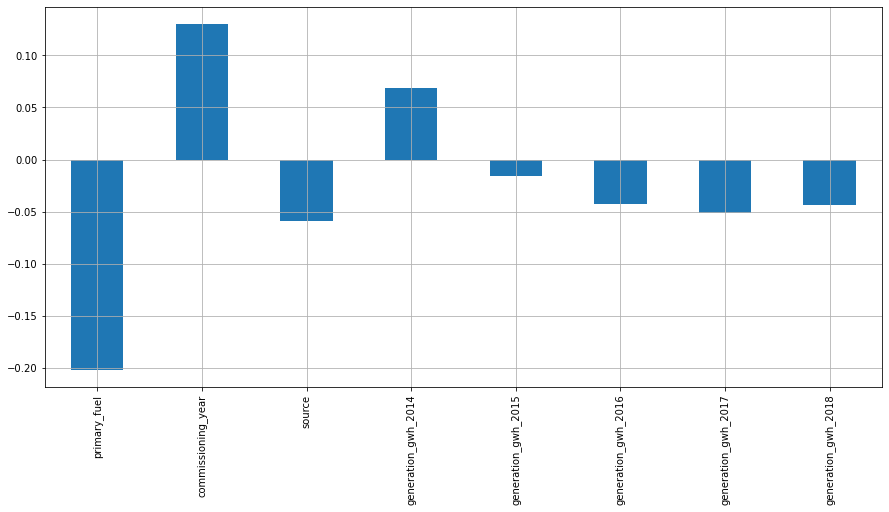

In [71]:
data.drop('capacity_mw',axis =1).corrwith(data.capacity_mw).plot(kind = 'bar', grid=True, figsize = (15,7))

In [72]:
# dropping 'generation_gwh_2015' since it has low relation with capacity and it has co relation with other feature.

In [73]:
data = data.drop(columns = 'generation_gwh_2015', axis =1)

In [74]:
x = data.drop(columns = ['capacity_mw'],axis =1)
y = data.capacity_mw

In [75]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.270257,primary_fuel
1,1.165694,commissioning_year
2,1.021376,source
3,3.991127,generation_gwh_2014
4,7.471814,generation_gwh_2016
5,11.102436,generation_gwh_2017
6,11.555425,generation_gwh_2018


In [78]:
from scipy.stats import skew

primary_fuel
0.03321960142776875


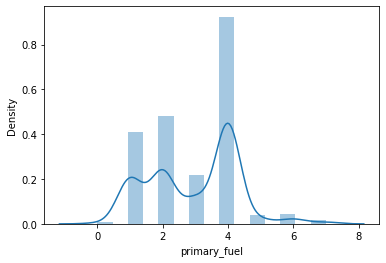

commissioning_year
-0.7468773623906684


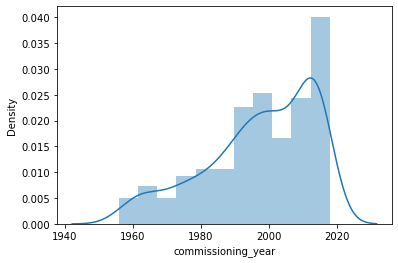

source
5.4161329842483275


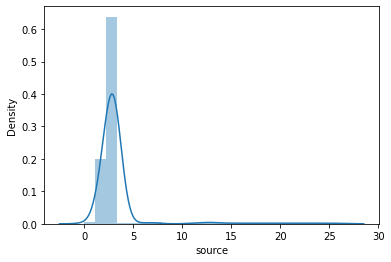

generation_gwh_2014
-0.30719574618608875


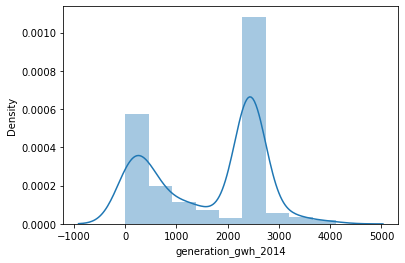

generation_gwh_2016
-0.12298690029681444


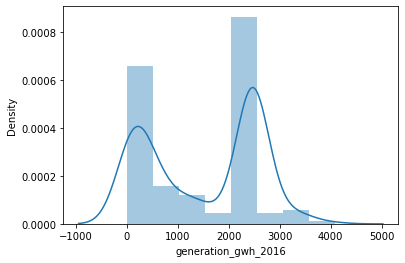

generation_gwh_2017
-0.14998059030850736


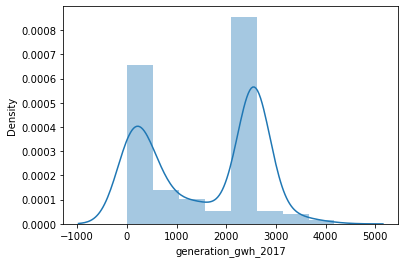

generation_gwh_2018
-0.11612116799151248


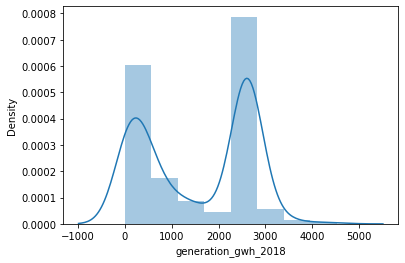

In [79]:
for col in x:
    print(col)
    print(skew(x[col]))
    
    plt.figure()
    sns.distplot(x[col])
    plt.show()

In [80]:
#Skewness is fine

In [81]:
#selction of Random state

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression

In [84]:
lr = LinearRegression()
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = i)
    lr.fit(x_train, y_train)
    predict_train = lr.predict(x_train)
    predict_test = lr.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{r2_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{r2_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.0791570408550748}
At random state 0, the test set accuracy is  {0.08784097695872406}
At random state 1, the train set accuracy is  {0.09632268110096442}
At random state 1, the test set accuracy is  {0.06556528958929753}
At random state 2, the train set accuracy is  {0.0809278045557762}
At random state 2, the test set accuracy is  {0.11406358955691709}
At random state 3, the train set accuracy is  {0.10015939509591709}
At random state 3, the test set accuracy is  {0.03476834683251495}
At random state 4, the train set accuracy is  {0.08647420199110478}
At random state 4, the test set accuracy is  {0.09712784876218106}
At random state 5, the train set accuracy is  {0.10237472139495318}
At random state 5, the test set accuracy is  {-0.0012386979193872438}
At random state 6, the train set accuracy is  {0.14548716320000843}
At random state 6, the test set accuracy is  {-0.06764469883580437}
At random state 7, the train set accuracy is  {0.0830

In [85]:
# at random state 96, the model perfroms well.So random state is 96
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = 96)
lr.fit(x_train, y_train)
predict_train = lr.predict(x_train)
predict_test = lr.predict(x_test)
print(f"The train set accuracy is ",{r2_score(y_train,predict_train)})
print(f"The test set accuracy is ",{r2_score(y_test,predict_test)})

The train set accuracy is  {0.08957522739712132}
The test set accuracy is  {0.08558743395976154}


In [86]:
#Model

In [87]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('R2_score:', r2_score(y_train, train_pred)*100,'% \n')
        print('Mean Squared Error:', mean_squared_error(y_train, train_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_train, train_pred),'\n')
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('R2_score:', r2_score(y_test, test_pred)*100,'%\n')
        print('Mean Squared Error:', mean_squared_error(y_test, test_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_test, test_pred),'\n')

In [88]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 8.957522739712132 % 

Mean Squared Error: 42651.50864792106 

Mean Absolute Error: 161.22422030547926 


===================Test Results============
R2_score: 8.558743395976155 %

Mean Squared Error: 46048.055834845574 

Mean Absolute Error: 165.7550580500081 



In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()

In [91]:
#random Forest

In [92]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
metric_score(rf,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 95.24343208389739 % 

Mean Squared Error: 2228.3532227276864 

Mean Absolute Error: 28.789097904607967 


===================Test Results============
R2_score: 68.30311059612002 %

Mean Squared Error: 15961.94307982161 

Mean Absolute Error: 74.89600902160599 



In [93]:
#decision Tree

In [94]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 99.60106943452756 % 

Mean Squared Error: 186.89067977052628 

Mean Absolute Error: 4.937138141688836 


===================Test Results============
R2_score: 40.26058390024719 %

Mean Squared Error: 30083.619476216147 

Mean Absolute Error: 95.02162928329226 



In [95]:
# KNN

In [96]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 69.99409356894279 % 

Mean Squared Error: 14057.143611921307 

Mean Absolute Error: 67.21798844221107 


===================Test Results============
R2_score: 63.29580483891445 %

Mean Squared Error: 18483.525827622554 

Mean Absolute Error: 80.76975789473684 



In [97]:
#gbr

In [98]:
metric_score(gbr,x_train,x_test,y_train,y_test,train=True)
metric_score(gbr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 93.07961585825608 % 

Mean Squared Error: 3242.0561582991472 

Mean Absolute Error: 38.169415334431775 


===================Test Results============
R2_score: 66.3654482805321 %

Mean Squared Error: 16937.71250612827 

Mean Absolute Error: 73.89627123340546 



In [107]:
# knn regression gives the best performance. so i selected knn Regression as final Model

In [108]:
#Hyperparameter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [134]:
params = { 'n_neighbors' : range(0,100),
               'weights' : ['uniform','distance'],
               'metric' : ['brute','euclidean','manhattan']}

In [135]:
grd = GridSearchCV(knn,param_grid=params)

In [136]:
grd.fit(x_train,y_train)
grd.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [139]:
knn_tuned = KNeighborsRegressor(metric='manhattan',n_jobs=3, weights='uniform')
knn_tuned.fit(x_train, y_train)

KNeighborsRegressor(metric='manhattan', n_jobs=3)

In [140]:
metric_score(knn_tuned,x_train,x_test,y_train,y_test,train=True)
metric_score(knn_tuned,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 69.52660127323038 % 

Mean Squared Error: 14276.154037531858 

Mean Absolute Error: 65.7019256281407 


===================Test Results============
R2_score: 59.79752700122416 %

Mean Squared Error: 20245.191176266464 

Mean Absolute Error: 78.95593684210526 



In [141]:
#saving the model

In [142]:
filename = 'Power Plant_capacity Prediction'
pickle.dump(knn_tuned,open(filename,'wb'))

In [143]:
saved_mod = pickle.load(open(filename,'rb'))

In [144]:
prediction = saved_mod.predict(x_train)
prediction

array([ 21.03  , 146.21  ,  11.58  , 401.256 , 149.2   ,  41.8   ,
       457.    , 122.35  , 316.604 ,  47.89  ,  39.1   , 410.2   ,
       126.47  , 336.2   , 120.64  ,  94.6   ,  40.8   ,  39.4   ,
       260.45  , 105.8   ,  69.16  ,  50.8   ,  17.89  ,  11.8   ,
       590.    ,  30.64  ,  53.08  ,  13.04  , 122.26  ,  37.32  ,
        50.8   ,  42.21  ,  69.14  ,  10.02  ,  68.5   , 163.551 ,
       383.8   ,  94.32  ,  30.64  , 450.404 , 122.26  ,  13.65  ,
        18.02  ,  18.02  ,  84.2   , 525.    ,  81.    , 330.6   ,
        11.58  , 237.    ,  39.4   ,  94.1   ,   7.3   ,  81.    ,
       231.2   ,  37.32  ,  41.34  ,  11.04  ,  42.21  ,  94.6   ,
        12.85  ,  16.    , 106.4   ,  21.03  ,  87.    , 170.4   ,
       165.4   , 414.2   ,  46.6   , 160.6   ,  82.56  , 246.754 ,
        69.16  , 100.07  ,  10.92  ,  42.8   , 254.2   , 456.    ,
        11.58  ,  81.    ,  27.51  ,  37.32  , 590.    , 324.4   ,
       170.4   , 126.    ,  88.7   , 236.8   , 561.    , 287.4

In [145]:
y_train

31      13.20
444    114.75
772      8.40
159    829.78
323    100.00
        ...  
86      30.00
830     50.40
595    330.00
720    500.00
105     60.00
Name: capacity_mw, Length: 398, dtype: float64

In [146]:
#prediction is almost close to the actual

MODEL FOR CLASSIFICATION MODEL ON PRIMARY FUEL

In [154]:
X = data.drop(columns = ['primary_fuel'],axis =1)
Y = data.primary_fuel

In [157]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [158]:
#selction of Random state

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [160]:
dt_c = DecisionTreeClassifier()

In [161]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,train_size = 0.75,random_state = i)
    dt_c.fit(x_train, y_train)
    predict_train = dt_c.predict(x_train)
    predict_test = dt_c.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{accuracy_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{accuracy_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {1.0}
At random state 0, the test set accuracy is  {0.8120300751879699}
At random state 1, the train set accuracy is  {1.0}
At random state 1, the test set accuracy is  {0.7819548872180451}
At random state 2, the train set accuracy is  {1.0}
At random state 2, the test set accuracy is  {0.7293233082706767}
At random state 3, the train set accuracy is  {1.0}
At random state 3, the test set accuracy is  {0.8195488721804511}
At random state 4, the train set accuracy is  {1.0}
At random state 4, the test set accuracy is  {0.7744360902255639}
At random state 5, the train set accuracy is  {1.0}
At random state 5, the test set accuracy is  {0.8345864661654135}
At random state 6, the train set accuracy is  {1.0}
At random state 6, the test set accuracy is  {0.7368421052631579}
At random state 7, the train set accuracy is  {1.0}
At random state 7, the test set accuracy is  {0.7218045112781954}
At random state 8, the train set accuracy is  {1.0}
At r

In [163]:
# at random state 32, the model perfroms well.So random state is 32
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,train_size = 0.75,random_state = 32)
dt_c.fit(x_train, y_train)
predict_train = dt_c.predict(x_train)
predict_test = dt_c.predict(x_test)
print(f"The train set accuracy is ",{accuracy_score(y_train,predict_train)})
print(f"The test set accuracy is ",{accuracy_score(y_test,predict_test)})

The train set accuracy is  {1.0}
The test set accuracy is  {0.8345864661654135}


In [164]:
#Models

In [165]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('Accuracy:', accuracy_score(y_train, train_pred)*100,'% \n')
        print("\n Test Classification Report -\n", classification_report(y_train, train_pred, digits = 2))
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('Accuracy:', accuracy_score(y_test, test_pred)*100,'%\n')
        print("\n Test Classification Report -\n", classification_report(y_test, test_pred, digits = 2))

In [166]:
metric_score(dt_c,x_train,x_test,y_train,y_test, train = True)
metric_score(dt_c,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        89
         3.0       1.00      1.00      1.00        46
         4.0       1.00      1.00      1.00       165
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398


===================Test Results============
Accuracy: 83.45864661654136 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       0.70      0.56 

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [170]:
rf_c = RandomForestClassifier()
knn_c = KNeighborsClassifier()
gbr_c = GradientBoostingClassifier()

In [171]:
# Random Forest

In [172]:
metric_score(rf_c,x_train,x_test,y_train,y_test, train = True)
metric_score(rf_c,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        89
         3.0       1.00      1.00      1.00        46
         4.0       1.00      1.00      1.00       165
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398


===================Test Results============
Accuracy: 78.94736842105263 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.59      0.40 

In [173]:
#knn
metric_score(knn_c,x_train,x_test,y_train,y_test, train = True)
metric_score(knn_c,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 79.89949748743719 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.74      0.77      0.75        77
         2.0       0.97      1.00      0.98        89
         3.0       0.55      0.48      0.51        46
         4.0       0.80      0.87      0.83       165
         5.0       0.75      0.38      0.50         8
         6.0       0.67      0.22      0.33         9
         7.0       0.00      0.00      0.00         3

    accuracy                           0.80       398
   macro avg       0.56      0.46      0.49       398
weighted avg       0.78      0.80      0.79       398


===================Test Results============
Accuracy: 75.18796992481202 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.5

In [174]:
# Gradient Boost 
metric_score(gbr_c,x_train,x_test,y_train,y_test, train = True)
metric_score(gbr_c,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        89
         3.0       1.00      1.00      1.00        46
         4.0       1.00      1.00      1.00       165
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398


===================Test Results============
Accuracy: 78.94736842105263 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       0.57      0.32 

In [176]:
# knn gives the high accuracy SO knn model has been selected as final model

In [177]:
#Cross Validation

In [178]:
from sklearn.model_selection import KFold,cross_val_score

In [181]:
cross_val_score(knn_c,X_scaled, Y, cv = 5)

array([0.65420561, 0.78301887, 0.76415094, 0.72641509, 0.70754717])

In [183]:
cross_val_score(knn_c,X_scaled, Y, cv = 5).mean()

0.7270675365896666

In [184]:
# no overfitting exist

In [185]:
# Hyperparameter Tuning

In [186]:
from sklearn.model_selection import GridSearchCV

In [192]:
params_c = { 'n_neighbors' : range(0,100),
               'weights' : ['uniform','distance'],
               'metric' : ['brute','euclidean','manhattan']}

In [193]:
grid = GridSearchCV(knn_c, param_grid = params_c)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['brute', 'euclidean', 'manhattan'],
                         'n_neighbors': range(0, 100),
                         'weights': ['uniform', 'distance']})

In [195]:
best = grid.best_params_
best

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [196]:
knn_tuned = KNeighborsClassifier(metric='manhattan',n_jobs=5, weights='distance')

In [197]:
knn_tuned.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=5, weights='distance')

In [198]:
metric_score(knn_tuned,x_train,x_test,y_train,y_test, train = True)
metric_score(knn_tuned,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        89
         3.0       1.00      1.00      1.00        46
         4.0       1.00      1.00      1.00       165
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398


===================Test Results============
Accuracy: 83.45864661654136 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.71      0.48 

In [199]:
#saving the model

In [201]:
filename = 'Power Plant_Fuel Prediction'
pickle.dump(knn_tuned,open(filename,'wb'))

In [202]:
saved_mod = pickle.load(open(filename,'rb'))

In [203]:
saved_mod.predict(x_test)

array([4., 3., 2., 4., 4., 4., 4., 1., 3., 3., 2., 4., 4., 4., 1., 3., 2.,
       4., 4., 2., 2., 4., 2., 2., 4., 4., 2., 4., 2., 4., 4., 4., 4., 4.,
       3., 4., 1., 4., 2., 1., 4., 4., 1., 1., 4., 4., 4., 2., 2., 4., 4.,
       1., 2., 4., 1., 4., 3., 4., 4., 2., 4., 4., 2., 4., 2., 3., 4., 4.,
       3., 3., 4., 4., 1., 4., 2., 2., 2., 4., 3., 2., 4., 4., 4., 4., 4.,
       4., 2., 4., 2., 2., 4., 6., 2., 4., 4., 4., 6., 4., 1., 6., 4., 2.,
       3., 4., 4., 4., 2., 4., 4., 1., 4., 1., 3., 4., 4., 2., 2., 4., 2.,
       2., 6., 2., 1., 1., 4., 1., 5., 4., 1., 1., 4., 4., 4.])

In [204]:
y_test

307    4.0
23     1.0
126    2.0
53     4.0
83     4.0
      ... 
49     1.0
380    1.0
701    4.0
17     1.0
548    4.0
Name: primary_fuel, Length: 133, dtype: float64

In [ ]:
#prediction is almost close to the actual

End of project